<a href="https://colab.research.google.com/github/Joyeta85/Personal_Fitness_Tracker1/blob/main/PDS_12_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Activity Tracking

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
path = "/content/drive/MyDrive/Dataset/2_Personal_Fitness_Tracker.csv"
df = pd.read_csv(path)

2.Progress Monitoring

Saving 2_Personal_Fitness_Tracker.csv to 2_Personal_Fitness_Tracker (1).csv
Weekly Summary of Total Activity Duration and Calories Burned
   Week  Total_Duration  Total_Calories
0     1             620            4550
1     2             965            7430
2     3             915            7120
3     4             675            5300


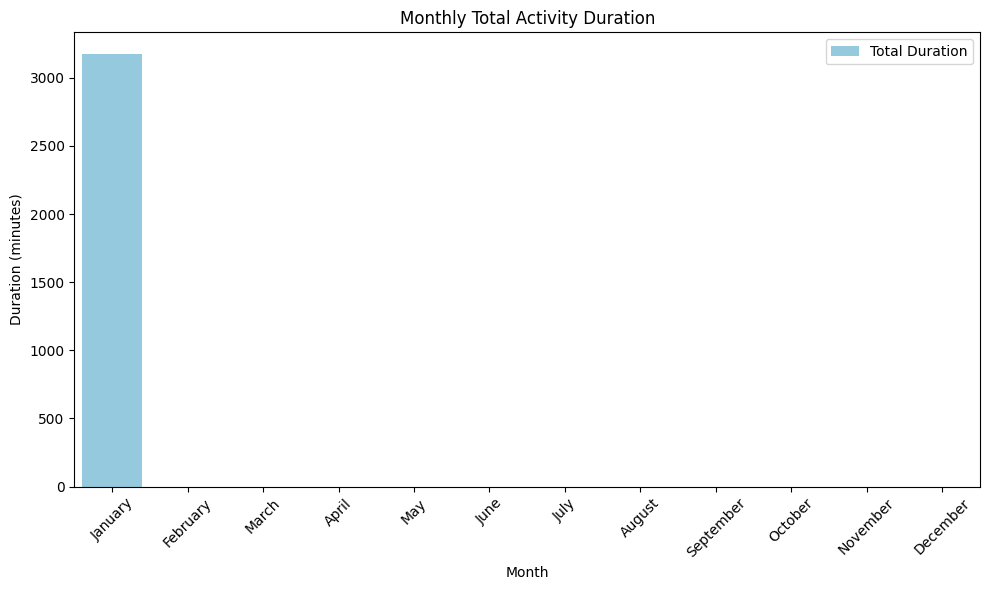

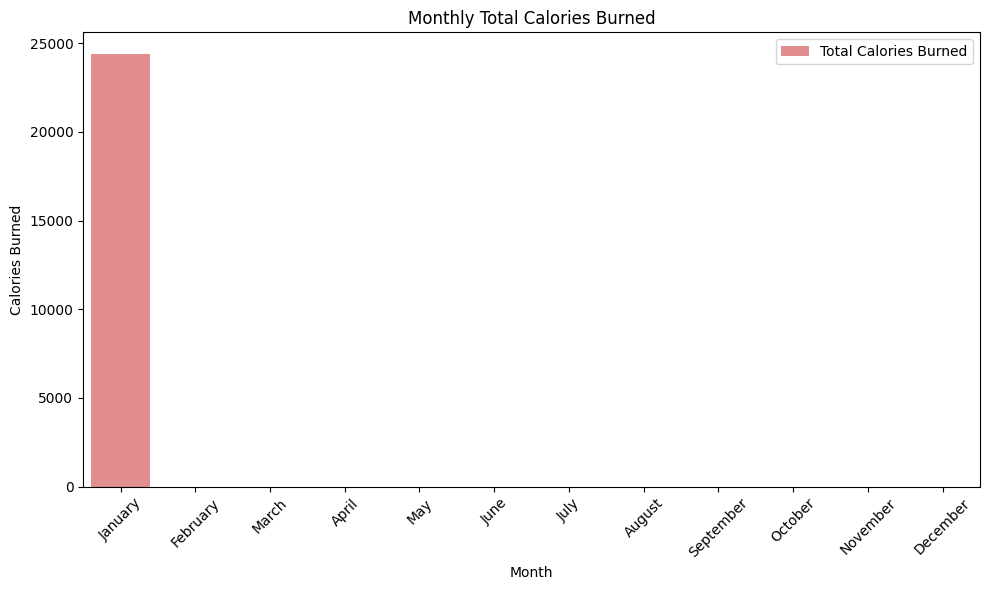

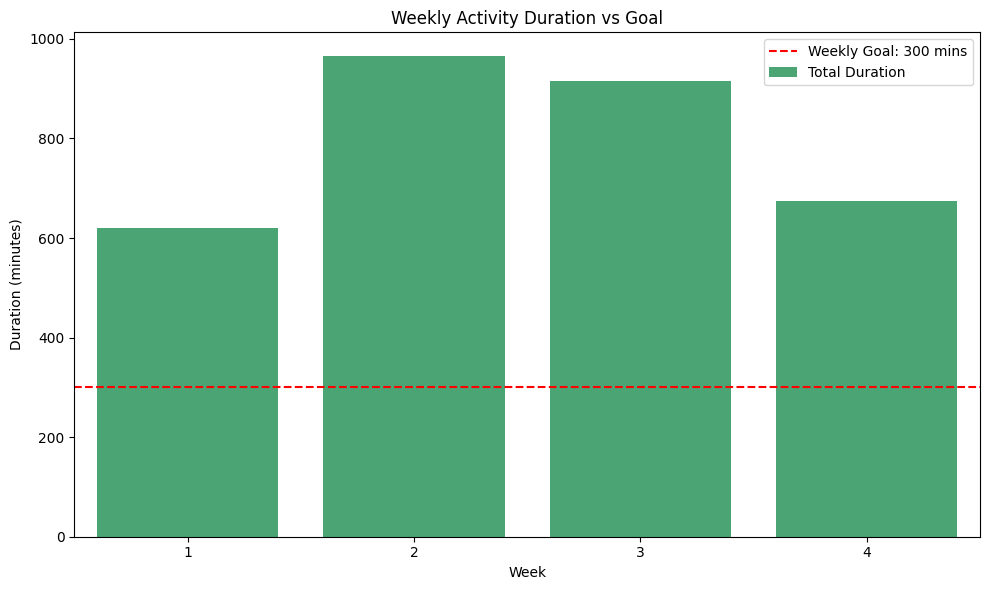

Weekly Goals Comparison
   Week  Total_Duration  Goal_Achieved
0     1             620           True
1     2             965           True
2     3             915           True
3     4             675           True


In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Upload dataset (replace 'your_file.csv' with the actual filename)
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add 'Week' and 'Month' columns
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month_name()

# Weekly Summary
weekly_summary = data.groupby('Week').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Display Weekly Summary
print("Weekly Summary of Total Activity Duration and Calories Burned")
print(weekly_summary)

# Plot Monthly Trends
monthly_summary = data.groupby('Month').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Reorder months for proper chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary['Month'] = pd.Categorical(monthly_summary['Month'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values('Month')

# Plotting Monthly Trends
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_summary, x='Month', y='Total_Duration', color='skyblue', label='Total Duration')
plt.xticks(rotation=45)
plt.title('Monthly Total Activity Duration')
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.legend()
plt.show()

# Plotting Total Calories Burned per Month
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_summary, x='Month', y='Total_Calories', color='lightcoral', label='Total Calories Burned')
plt.xticks(rotation=45)
plt.title('Monthly Total Calories Burned')
plt.xlabel('Month')
plt.ylabel('Calories Burned')
plt.tight_layout()
plt.legend()
plt.show()

# Weekly Goals Comparison
weekly_goal = 300  # User-defined weekly goal in minutes
weekly_summary['Goal_Achieved'] = weekly_summary['Total_Duration'] >= weekly_goal

# Plot Goal Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=weekly_summary, x='Week', y='Total_Duration', color='mediumseagreen', label='Total Duration')
plt.axhline(y=weekly_goal, color='red', linestyle='--', label=f'Weekly Goal: {weekly_goal} mins')
plt.title('Weekly Activity Duration vs Goal')
plt.xlabel('Week')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.tight_layout()
plt.show()

# Display Comparison
print("Weekly Goals Comparison")
print(weekly_summary[['Week', 'Total_Duration', 'Goal_Achieved']])


3.Goal Setting

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add additional columns
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.date

# --- USER INPUT: Fitness Goals ---
weekly_goal_minutes = 150  # Example: 150 minutes per week
daily_goal_calories = 500  # Example: 500 calories per day

# --- Weekly Summary ---
weekly_summary = data.groupby('Week').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Add Goal Tracking for Weekly Goals
weekly_summary['Weekly_Goal_Met'] = weekly_summary['Total_Duration'] >= weekly_goal_minutes

# Display Weekly Summary
print("Weekly Summary with Goal Tracking")
print(weekly_summary)

# --- Daily Summary ---
daily_summary = data.groupby('Day').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Add Goal Tracking for Daily Goals
daily_summary['Daily_Goal_Met'] = daily_summary['Total_Calories'] >= daily_goal_calories

# Display Daily Summary
print("\nDaily Summary with Goal Tracking")
print(daily_summary)

# --- Notifications ---
print("\nNotifications:")
# Weekly Goal Notifications
for index, row in weekly_summary.iterrows():
    if row['Weekly_Goal_Met']:
        print(f"Week {row['Week']}: Great job! You met your weekly goal of {weekly_goal_minutes} minutes.")
    else:
        print(f"Week {row['Week']}: You fell short of your weekly goal by {weekly_goal_minutes - row['Total_Duration']} minutes.")

# Daily Goal Notifications
for index, row in daily_summary.iterrows():
    if row['Daily_Goal_Met']:
        print(f"Day {row['Day']}: Well done! You met your daily goal of burning {daily_goal_calories} calories.")
    else:
        print(f"Day {row['Day']}: You fell short of your daily goal by {daily_goal_calories - row['Total_Calories']} calories.")


Saving 2_Personal_Fitness_Tracker.csv to 2_Personal_Fitness_Tracker (3).csv
Weekly Summary with Goal Tracking
   Week  Total_Duration  Total_Calories  Weekly_Goal_Met
0     1             620            4550             True
1     2             965            7430             True
2     3             915            7120             True
3     4             675            5300             True

Daily Summary with Goal Tracking
           Day  Total_Duration  Total_Calories  Daily_Goal_Met
0   2025-01-01             135             900            True
1   2025-01-02             105             720            True
2   2025-01-03             135             930            True
3   2025-01-04             130            1050            True
4   2025-01-05             115             950            True
5   2025-01-06             145            1170            True
6   2025-01-07             135             950            True
7   2025-01-08             120            1000            True
8   

4. Advanced Features

Saving 2_Personal_Fitness_Tracker.csv to 2_Personal_Fitness_Tracker (4).csv

--- BMI Calculator ---
Enter your weight (kg): 55
Enter your height (cm): 154.94
Enter your age: 24
Your BMI is 22.91, which falls under the category: Normal weight.
Suggestion: Maintain your weight with a balanced diet and regular exercise.

--- Health Tip of the Day ---
Get enough sleep (7-9 hours) to help your body recover and stay energized.

--- Exercise Recommendations ---
Enter available time (in minutes): 8
Enter your calorie-burning target: 500
No recommendations available for the given inputs.


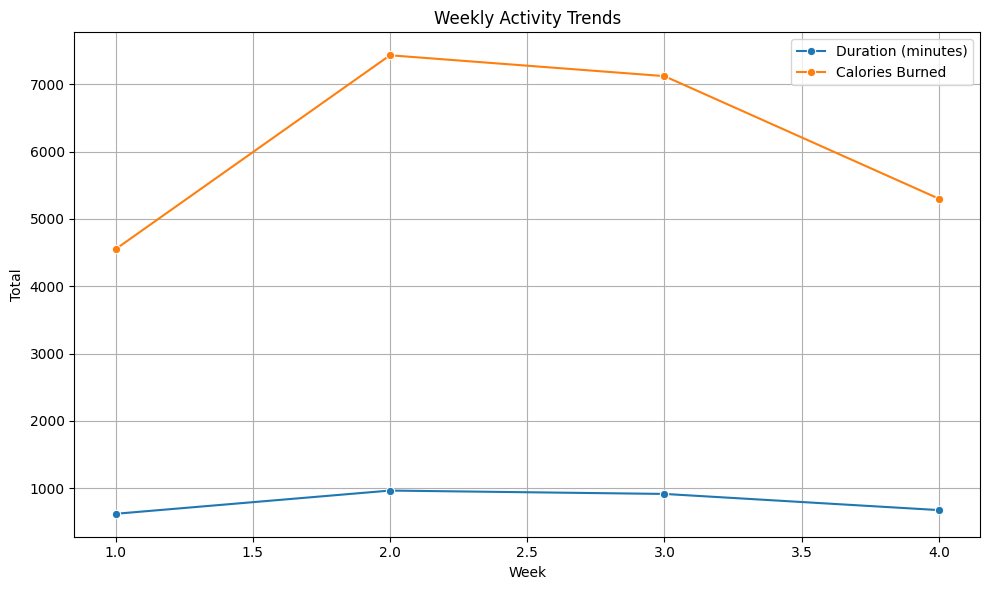

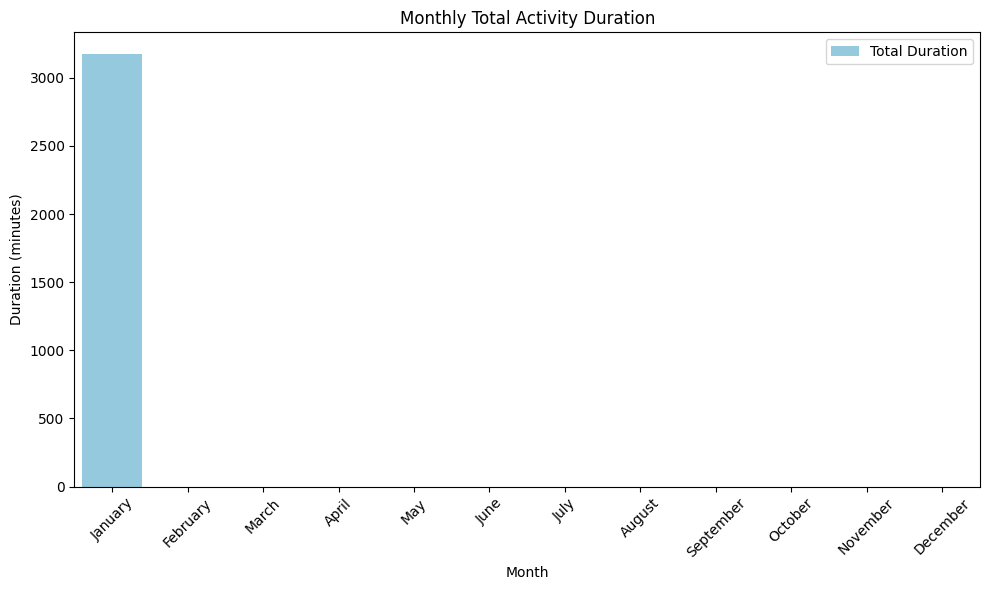

In [7]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add additional columns
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.date

# --- 1. BMI Calculator ---
def calculate_bmi(weight, height):
    """Calculate BMI and return BMI category."""
    bmi = weight / (height / 100) ** 2
    if bmi < 18.5:
        category = "Underweight"
    elif 18.5 <= bmi < 24.9:
        category = "Normal weight"
    elif 25 <= bmi < 29.9:
        category = "Overweight"
    else:
        category = "Obesity"
    return bmi, category

print("\n--- BMI Calculator ---")
weight = float(input("Enter your weight (kg): "))
height = float(input("Enter your height (cm): "))
age = int(input("Enter your age: "))
bmi, category = calculate_bmi(weight, height)
print(f"Your BMI is {bmi:.2f}, which falls under the category: {category}.")

if category == "Underweight":
    print("Suggestion: Include strength training and a calorie-rich diet to gain healthy weight.")
elif category == "Normal weight":
    print("Suggestion: Maintain your weight with a balanced diet and regular exercise.")
elif category == "Overweight":
    print("Suggestion: Focus on cardio activities like running or cycling to lose weight.")
else:
    print("Suggestion: Combine a healthy diet with activities like brisk walking or swimming.")

# --- 2. Health Tips ---
health_tips = [
    "Drink at least 8 glasses of water daily to stay hydrated.",
    "Incorporate at least 30 minutes of moderate exercise into your daily routine.",
    "Eat a variety of fruits and vegetables to boost your immune system.",
    "Get enough sleep (7-9 hours) to help your body recover and stay energized.",
    "Practice mindfulness or meditation to reduce stress levels."
]

print("\n--- Health Tip of the Day ---")
print(random.choice(health_tips))

# --- 3. Exercise Recommendations ---
def suggest_exercises(time_available, calorie_target):
    """Suggest exercises based on time and calorie targets."""
    exercises = {
        "Running": 10,  # burns 10 calories per minute
        "Cycling": 8,  # burns 8 calories per minute
        "Yoga": 5,  # burns 5 calories per minute
        "Swimming": 12,  # burns 12 calories per minute
        "Walking": 4  # burns 4 calories per minute
    }
    suggestions = []
    for activity, burn_rate in exercises.items():
        if calorie_target / burn_rate <= time_available:
            suggestions.append((activity, calorie_target / burn_rate))
    return suggestions

print("\n--- Exercise Recommendations ---")
time_available = int(input("Enter available time (in minutes): "))
calorie_target = int(input("Enter your calorie-burning target: "))
recommendations = suggest_exercises(time_available, calorie_target)

if recommendations:
    print(f"Based on your inputs, you can try:")
    for activity, duration in recommendations:
        print(f"- {activity}: {duration:.1f} minutes")
else:
    print("No recommendations available for the given inputs.")

# --- 4. Data Visualization ---
# Weekly Summary
weekly_summary = data.groupby('Week').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Plot Weekly Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_summary, x='Week', y='Total_Duration', marker='o', label='Duration (minutes)')
sns.lineplot(data=weekly_summary, x='Week', y='Total_Calories', marker='o', label='Calories Burned')
plt.title('Weekly Activity Trends')
plt.xlabel('Week')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Monthly Trends
monthly_summary = data.groupby('Month').agg(
    Total_Duration=('Duration (minutes)', 'sum'),
    Total_Calories=('Calories Burned', 'sum')
).reset_index()

# Reorder months for proper chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary['Month'] = pd.Categorical(monthly_summary['Month'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values('Month')

# Plot Monthly Trends
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_summary, x='Month', y='Total_Duration', color='skyblue', label='Total Duration')
plt.xticks(rotation=45)
plt.title('Monthly Total Activity Duration')
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.legend()
plt.show()


5. User Interface

In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Load initial dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Add additional columns
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.date

# Initialize fitness goals
weekly_goal_minutes = 150  # Default weekly goal
daily_goal_calories = 500  # Default daily goal

# --- Functions for the Menu ---

def log_activity():
    """Log a new activity."""
    global data
    print("\n--- Log a New Activity ---")
    date = input("Enter the date (YYYY-MM-DD): ")
    activity_name = input("Enter the activity name: ")
    duration = int(input("Enter the duration (in minutes): "))
    calories = int(input("Enter the calories burned: "))

    # Add the new activity to the dataset
    new_entry = {'Date': pd.to_datetime(date),
                 'Activity Name': activity_name,
                 'Duration (minutes)': duration,
                 'Calories Burned': calories}
    data = pd.concat([data, pd.DataFrame([new_entry])], ignore_index=True)
    print("Activity logged successfully!")

def view_activity_history():
    """View activity history."""
    print("\n--- Activity History ---")
    print(data[['Date', 'Activity Name', 'Duration (minutes)', 'Calories Burned']])

def set_update_fitness_goals():
    """Set or update fitness goals."""
    global weekly_goal_minutes, daily_goal_calories
    print("\n--- Set or Update Fitness Goals ---")
    weekly_goal_minutes = int(input("Enter your new weekly goal (in minutes): "))
    daily_goal_calories = int(input("Enter your new daily calorie-burning goal: "))
    print(f"Weekly goal set to {weekly_goal_minutes} minutes.")
    print(f"Daily calorie goal set to {daily_goal_calories} calories.")

def view_progress_reports():
    """View progress reports."""
    global weekly_goal_minutes, daily_goal_calories
    print("\n--- Progress Reports ---")

    # Weekly Summary
    weekly_summary = data.groupby('Week').agg(
        Total_Duration=('Duration (minutes)', 'sum'),
        Total_Calories=('Calories Burned', 'sum')
    ).reset_index()
    weekly_summary['Weekly_Goal_Met'] = weekly_summary['Total_Duration'] >= weekly_goal_minutes
    print("\nWeekly Progress:")
    print(weekly_summary)

    # Daily Summary
    daily_summary = data.groupby(data['Date'].dt.date).agg(
        Total_Duration=('Duration (minutes)', 'sum'),
        Total_Calories=('Calories Burned', 'sum')
    ).reset_index()
    daily_summary['Daily_Goal_Met'] = daily_summary['Total_Calories'] >= daily_goal_calories
    print("\nDaily Progress:")
    print(daily_summary)

    # Visualizations
    plt.figure(figsize=(10, 6))
    sns.barplot(data=weekly_summary, x='Week', y='Total_Duration', color='skyblue', label='Total Duration')
    plt.axhline(y=weekly_goal_minutes, color='red', linestyle='--', label=f'Weekly Goal: {weekly_goal_minutes} mins')
    plt.title('Weekly Activity Duration vs Weekly Goal')
    plt.xlabel('Week')
    plt.ylabel('Total Duration (minutes)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=daily_summary, x='Date', y='Total_Calories', color='lightcoral', label='Calories Burned')
    plt.axhline(y=daily_goal_calories, color='green', linestyle='--', label=f'Daily Goal: {daily_goal_calories} cals')
    plt.title('Daily Calories Burned vs Daily Goal')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Calories Burned')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Menu-Driven Interface ---
def main_menu():
    """Main menu for the program."""
    while True:
        print("\n--- Fitness Tracker Menu ---")
        print("1. Log a New Activity")
        print("2. View Activity History")
        print("3. Set or Update Fitness Goals")
        print("4. View Progress Reports")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == '1':
            log_activity()
        elif choice == '2':
            view_activity_history()
        elif choice == '3':
            set_update_fitness_goals()
        elif choice == '4':
            view_progress_reports()
        elif choice == '5':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice! Please select a valid option.")

        # Clear the output after each operation for better readability
        input("\nPress Enter to return to the menu...")
        clear_output()

# Run the program
main_menu()



--- Fitness Tracker Menu ---
1. Log a New Activity
2. View Activity History
3. Set or Update Fitness Goals
4. View Progress Reports
5. Exit
Enter your choice (1-5): 5
Exiting the program. Goodbye!
